# Importing Dataset and Getting Basic Info

In [1]:
# importing pandas for handling tables and data
import pandas as pd  

# importing numpy for mathematical operations
import numpy as np  

# importing seaborn for data visualization
import seaborn as sns  

# importing matplotlib for plotting graphs
import matplotlib.pyplot as plt  

# to display plots inside the notebook
%matplotlib inline  

In [2]:
data = pd.read_csv("Titanic-Dataset.csv") # loading dataset in a variable named data
data.head() # printing first 5 rows od dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info() # showing information about the dataset like columns, data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe() # showing statistical summary of the dataset like mean, count, min, max

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling the Missing Values

In [5]:
data.isnull().sum() # showing how many missing values are in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data = data.drop(columns=["Cabin"]) # removing Cabin column
data.sample() # printing a random row of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,S


In [7]:
# filling missing values in the Age column with the median value of Age
data["Age"].fillna(data["Age"].median(), inplace=True) 

C:\Users\HELLO\AppData\Local\Temp\ipykernel_17420\1147633402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)


In [8]:
# counting how many times each value appears in the Embarked column
counts = data["Embarked"].value_counts()
print(counts)

# filling missing values in the Embarked column with 'S'
data["Embarked"].fillna('S', inplace=True)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\HELLO\AppData\Local\Temp\ipykernel_17420\3777725828.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna('S', inplace=True)


In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualisation

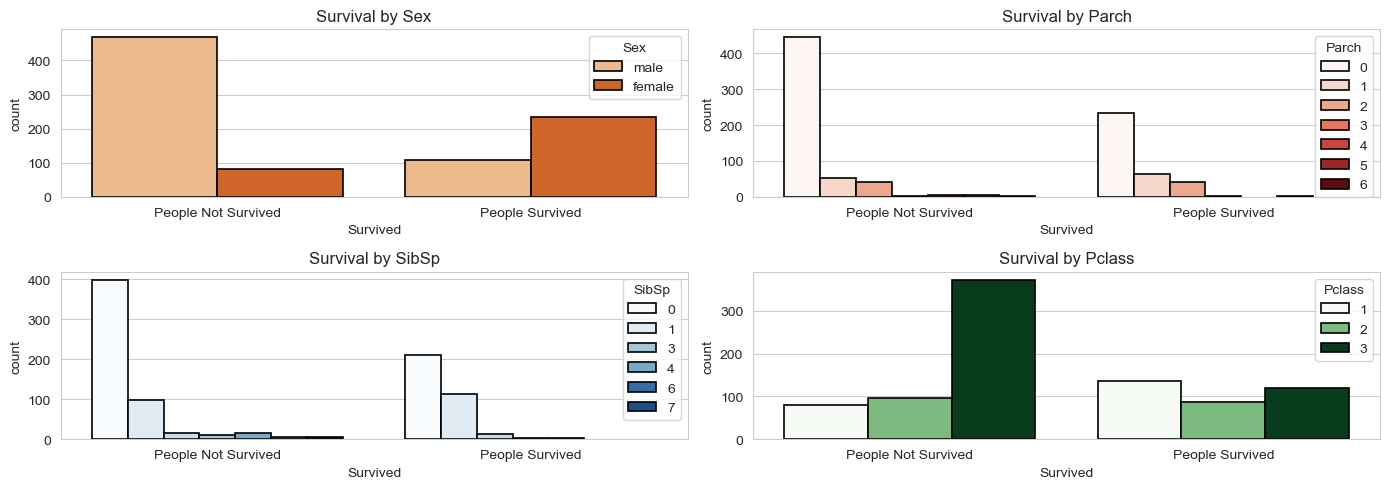

In [10]:
# setting white grid style for plots
sns.set_style("whitegrid")

# creating 2 rows and 2 columns of plots with a figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 5))

# plotting survival by Sex
ax1 = sns.countplot(x="Survived", hue="Sex", data=data, palette="Oranges", edgecolor="black", linewidth=1.2, ax=axes[0, 0])
ax1.set_xticks([0,1])
ax1.set_xticklabels(['People Not Survived','People Survived'])
ax1.set_title("Survival by Sex")
ax1.legend(title='Sex')

# plotting survival by Parch
ax2 = sns.countplot(x="Survived", hue="Parch", data=data, palette="Reds", edgecolor="black", linewidth=1.2, ax=axes[0, 1])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['People Not Survived','People Survived'])
ax2.set_title("Survival by Parch")
ax2.legend(title='Parch')

# plotting survival by SibSp
ax3 = sns.countplot(x="Survived", hue="SibSp", data=data, palette="Blues", edgecolor="black", linewidth=1.2, ax=axes[1, 0])
ax3.set_xticks([0,1])
ax3.set_xticklabels(['People Not Survived','People Survived'])
ax3.set_title("Survival by SibSp")
ax3.legend(title='SibSp')

# plotting survival by Pclass
ax4 = sns.countplot(x="Survived", hue="Pclass", data=data, palette="Greens", edgecolor="black", linewidth=1.2, ax=axes[1, 1])
ax4.set_xticks([0,1])
ax4.set_xticklabels(['People Not Survived','People Survived'])
ax4.set_title("Survival by Pclass")
ax4.legend(title='Pclass')

# adjusting layout so plots don’t overlap
plt.tight_layout()
# showing the plots
plt.show()

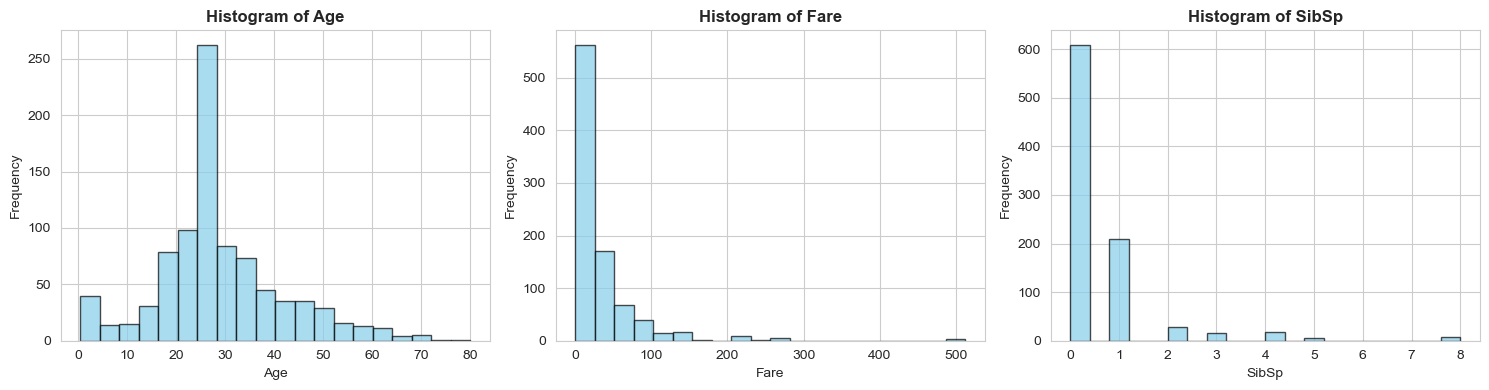

In [11]:
# selecting the numeric columns to plot histograms
numeric_cols = ['Age', 'Fare', 'SibSp']

# setting the figure size for the histograms
plt.figure(figsize=(15,4))

# looping through each numeric column to plot histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)  # creating a subplot for each column
    plt.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # plotting histogram
    plt.title(f'Histogram of {col}', fontsize=12, fontweight='bold')  # setting title
    plt.xlabel(col)  # x-axis label
    plt.ylabel('Frequency')  # y-axis label

# adjusting layout so plots don’t overlap
plt.tight_layout()
# showing the histograms
plt.show()


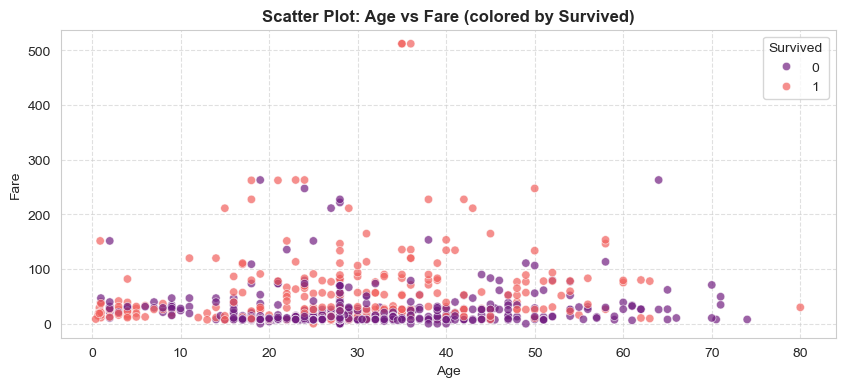

In [12]:
# selecting the numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp']

# setting the figure size for the scatter plot
plt.figure(figsize=(10,4))

# creating a scatter plot of Age vs Fare colored by Survived
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='magma', alpha=0.7)

# setting the title of the plot
plt.title('Scatter Plot: Age vs Fare (colored by Survived)', fontsize=12, fontweight='bold')

# labeling x-axis and y-axis
plt.xlabel('Age')
plt.ylabel('Fare')

# adding grid lines to the plot
plt.grid(True, linestyle='--', alpha=0.6)

# showing the scatter plot
plt.show()


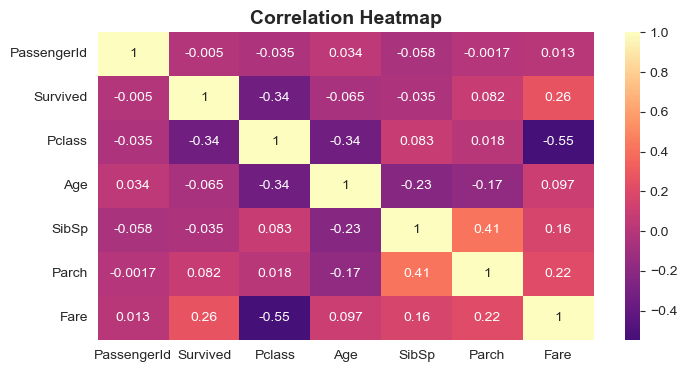

In [13]:
# setting the figure size for the heatmap
plt.figure(figsize=(8,4))

# calculating correlation between numeric columns
corr = data.corr(numeric_only=True)

# creating a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='magma', center=0)  # also dark palette

# setting the title of the heatmap
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

# showing the heatmap
plt.show()


# Working with Outliers

In [14]:
# gives mean, median, std, min, max for numeric columns
stats_df = data.describe().T   # transpose to make rows as columns for readability

# adding median column to the stats dataframe
stats_df['median'] = data.median(numeric_only=True)

# printing only mean, median, std, min and max columns
print(stats_df[['mean', 'median', 'std', 'min', 'max']])

                   mean    median         std   min       max
PassengerId  446.000000  446.0000  257.353842  1.00  891.0000
Survived       0.383838    0.0000    0.486592  0.00    1.0000
Pclass         2.308642    3.0000    0.836071  1.00    3.0000
Age           29.361582   28.0000   13.019697  0.42   80.0000
SibSp          0.523008    0.0000    1.102743  0.00    8.0000
Parch          0.381594    0.0000    0.806057  0.00    6.0000
Fare          32.204208   14.4542   49.693429  0.00  512.3292


In [15]:
# selecting numeric columns from the dataset
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

# creating a dictionary to store outliers for each column
outliers = {}

# looping through each numeric column to find outliers
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)  # first quartile
    Q3 = data[col].quantile(0.75)  # third quartile
    IQR = Q3 - Q1  # interquartile range
    lower_bound = Q1 - 1.5 * IQR  # lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # upper bound for outliers
    # selecting rows where values are below lower bound or above upper bound
    outlier_rows = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outliers[col] = outlier_rows  # storing outlier rows in the dictionary

# showing number of outliers per column
for col, rows in outliers.items():
    print(f"{col}: {len(rows)} outliers")


PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


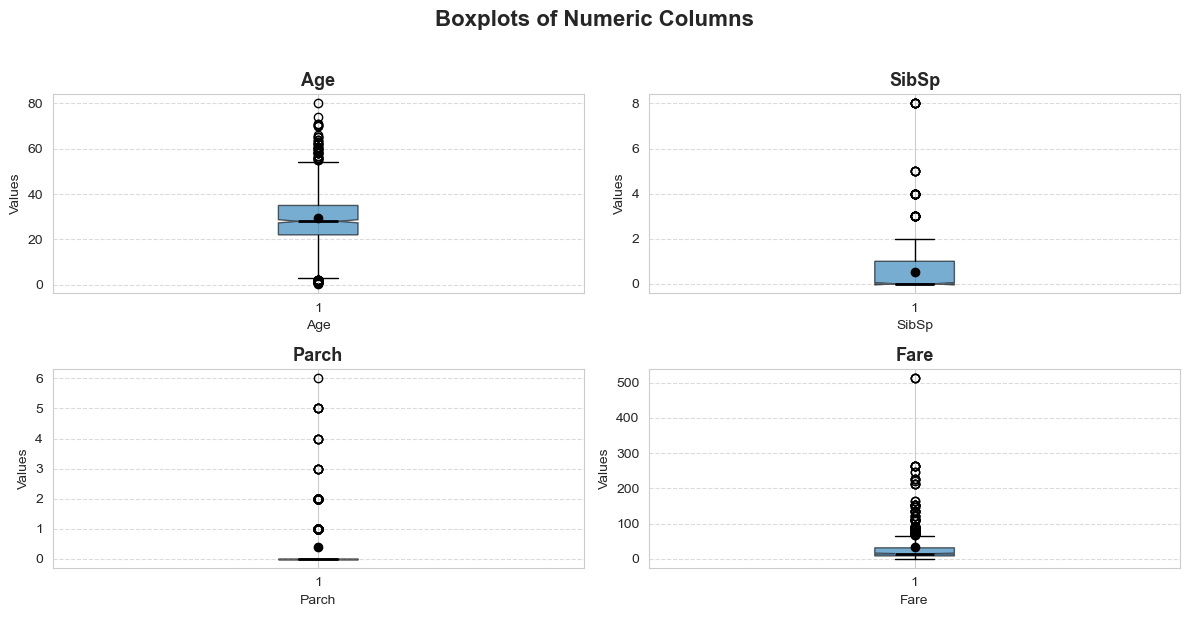

In [18]:
# selecting the columns for boxplots
cols = ['Age', 'SibSp', 'Parch', 'Fare']

# setting the figure size for the boxplots
plt.figure(figsize=(12,6))

# looping through each column to create boxplots
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  # creating 2x2 subplots
    box = plt.boxplot(
        data[col].dropna(),  # dropping missing values
        notch=True,          # drawing notch
        patch_artist=True,   # fill the box with color
        showmeans=True       # show mean point
    )
    # applying same style to all parts of the boxplot
    for patch in box['boxes']:
        patch.set_facecolor('#1f77b4')    # same color for all boxes
        patch.set_alpha(0.6)
        patch.set_edgecolor('black')
    for whisker in box['whiskers']:
        whisker.set_color('black')
    for cap in box['caps']:
        cap.set_color('black')
    for median in box['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    for mean in box['means']:
        mean.set_marker('o')
        mean.set_markerfacecolor('black')
        mean.set_markeredgecolor('black')
    
    # setting title and axis labels
    plt.title(f'{col}', fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Values')
    # adding grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# main title for all boxplots
plt.suptitle("Boxplots of Numeric Columns", fontsize=16, fontweight='bold', y=1.02)
# adjusting layout to avoid overlapping
plt.tight_layout()
# showing the boxplots
plt.show()


# Label Enconding & Normalising Data

In [19]:
# importing label encoder for converting text labels to numbers
from sklearn.preprocessing import LabelEncoder

# creating label encoder object
le = LabelEncoder()

# encoding the 'Sex' column into numbers
data['Sex'] = le.fit_transform(data['Sex'])

# encoding the 'Embarked' column into numbers
data['Embarked'] = le.fit_transform(data['Embarked'])

# showing 5 random rows from the dataset
data.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",0,28.0,1,0,376564,16.1000,2
470,471,0,3,"Keefe, Mr. Arthur",1,28.0,0,0,323592,7.2500,2
75,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",0,28.0,1,0,367230,15.5000,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",0,22.0,0,0,7552,10.5167,2


In [20]:
# importing standard scaler to scale numeric columns
from sklearn.preprocessing import StandardScaler

# selecting numeric columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# creating scaler object
scaler = StandardScaler()

# scaling the selected numeric columns
data[num_cols] = scaler.fit_transform(data[num_cols])

# showing the first 5 rows of the scaled data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,2


In [21]:
# dropping columns that are not useful for modeling
final_data = data.drop(columns=["PassengerId", "Name", "Ticket"])

# showing the first 5 rows of the new dataset
final_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,2
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,0
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,2
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,2
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,2


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 48.9 KB


# Train & Testing Data

In [23]:
# importing train_test_split to split the dataset into train and test sets
from sklearn.model_selection import train_test_split

# separating features and target variable
X = final_data.drop(columns=["Survived"])
y = final_data["Survived"]

# splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# printing the length of train and test data
print("Length of Train data:", len(X_train))
print("Length of Test data:", len(X_test))


Length of Train data: 712
Length of Test data: 179


# Machine Learning Models

In [24]:
# importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

# importing Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# importing Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# importing Support Vector Classifier model
from sklearn.svm import SVC

# importing metrics to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Logistic Regression Results:
Accuracy: 0.8045
Precision: 0.7931
Recall: 0.6667
F1-Score: 0.7244


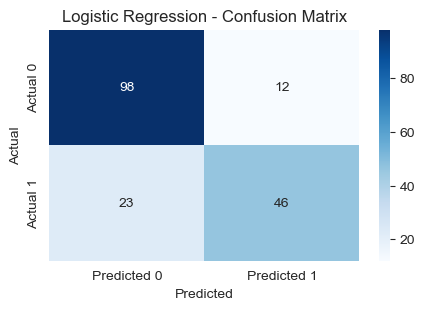

In [25]:
# creating logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# fitting the model on training data
logistic_reg.fit(X_train, y_train)

# predicting target values for test data
y_predict = logistic_reg.predict(X_test)

# calculating accuracy of the model
accuracy = accuracy_score(y_test, y_predict)
# calculating precision of the model
precision = precision_score(y_test, y_predict)
# calculating recall of the model
recall = recall_score(y_test, y_predict)
# calculating f1-score of the model
f1 = f1_score(y_test, y_predict)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# printing model evaluation metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

Random Forest Classifier Results:
Accuracy: 0.8268
Precision: 0.8065
Recall: 0.7246
F1-Score: 0.7634


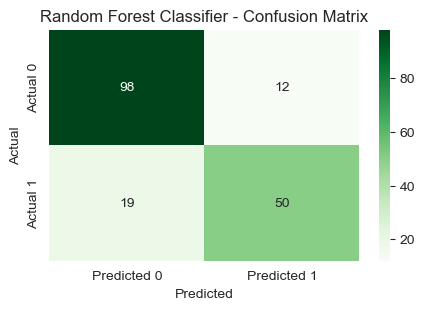

In [26]:
# creating random forest classifier model
random_forest = RandomForestClassifier(random_state=42)

# fitting the model on training data
random_forest.fit(X_train, y_train)

# predicting target values for test data
y_predict = random_forest.predict(X_test)

# calculating accuracy of the model
accuracy = accuracy_score(y_test, y_predict)
# calculating precision of the model
precision = precision_score(y_test, y_predict)
# calculating recall of the model
recall = recall_score(y_test, y_predict)
# calculating f1-score of the model
f1 = f1_score(y_test, y_predict)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# printing model evaluation metrics
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

Decision Tree Classifier Results:
Accuracy: 0.8324
Precision: 0.8000
Recall: 0.7536
F1-Score: 0.7761


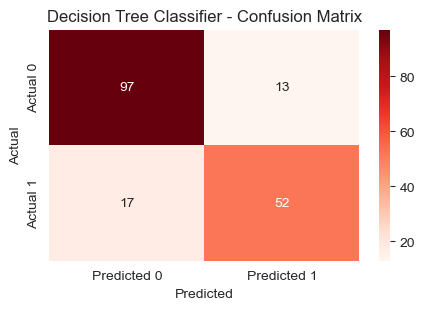

In [27]:
# creating decision tree classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# fitting the model on training data
decision_tree.fit(X_train, y_train)

# predicting target values for test data
y_predict = decision_tree.predict(X_test)

# calculating accuracy of the model
accuracy = accuracy_score(y_test, y_predict)
# calculating precision of the model
precision = precision_score(y_test, y_predict)
# calculating recall of the model
recall = recall_score(y_test, y_predict)
# calculating f1-score of the model
f1 = f1_score(y_test, y_predict)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# printing model evaluation metrics
print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.show()

SVC Results:
Accuracy: 0.8212
Precision: 0.8033
Recall: 0.7101
F1-Score: 0.7538


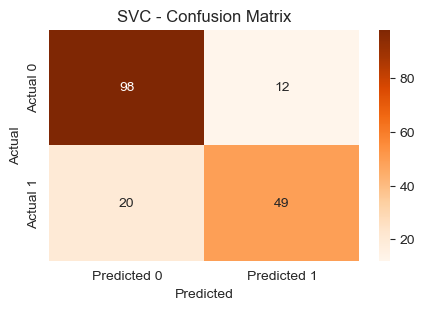

In [28]:
# creating support vector classifier model
suppourt_vector = SVC(random_state=42)

# fitting the model on training data
suppourt_vector.fit(X_train, y_train)

# predicting target values for test data
y_predict = suppourt_vector.predict(X_test)

# calculating accuracy of the model
accuracy = accuracy_score(y_test, y_predict)
# calculating precision of the model
precision = precision_score(y_test, y_predict)
# calculating recall of the model
recall = recall_score(y_test, y_predict)
# calculating f1-score of the model
f1 = f1_score(y_test, y_predict)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# printing model evaluation metrics
print("SVC Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC - Confusion Matrix')
plt.show()

# Using of HyperParameters

In [29]:
# importing GridSearchCV for hyperparameter tuning of models
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

Tuned Logistic Regression Results:
Accuracy: 0.8045
Precision: 0.7297
Recall: 0.7826
F1-Score: 0.7552


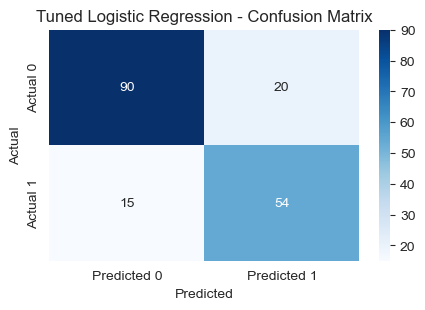

In [30]:
# setting hyperparameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                   # regularization strength
    'penalty': ['l1', 'l2'],                        # regularization type
    'solver': ['liblinear', 'saga'],                # solvers supporting l1/l2
    'class_weight': [None, 'balanced']              # handle class imbalance
}

# creating logistic regression model
logistic = LogisticRegression(max_iter=5000, random_state=42)

# setting up GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=logistic,
                           param_grid=param_grid,
                           scoring='f1',           # optimize for F1-score
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# fitting GridSearchCV on training data
grid_search.fit(X_train, y_train)

# getting the best logistic regression model
best_logistic = grid_search.best_estimator_
# printing best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# predicting target values using the tuned model
y_pred_best = best_logistic.predict(X_test)

# calculating accuracy of the improved model
accuracy = accuracy_score(y_test, y_pred_best)
# calculating precision of the improved model
precision = precision_score(y_test, y_pred_best)
# calculating recall of the improved model
recall = recall_score(y_test, y_pred_best)
# calculating f1-score of the improved model
f1 = f1_score(y_test, y_pred_best)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# printing improved logistic regression metrics
print("\nTuned Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Logistic Regression - Confusion Matrix')
plt.show()


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Classifier Results:
Accuracy: 0.8156
Precision: 0.8214
Recall: 0.6667
F1-Score: 0.7360


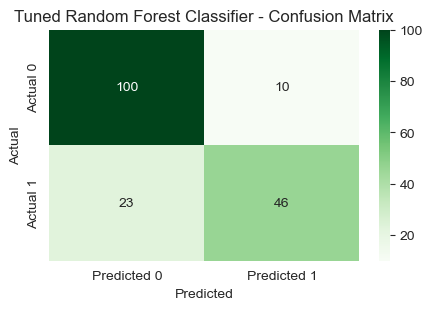

In [32]:
# setting hyperparameter grid for random forest
param_grid = {
    'n_estimators': [200, 400, 500],          # number of trees in the forest
    'max_depth': [10, 20, 30],                # maximum depth of each tree
    'min_samples_split': [2, 3, 5],           # minimum samples required to split a node
    'min_samples_leaf': [1, 2],         # minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'], # number of features to consider at each split
    'bootstrap': [True, False],               # whether bootstrap samples are used
    'class_weight': [None, 'balanced']        # handle class imbalance
}

# creating random forest classifier
rf = RandomForestClassifier(random_state=42)

# setting up GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(rf, param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# fitting GridSearchCV on training data
grid_search.fit(X_train, y_train)

# getting the best random forest model
best_rf = grid_search.best_estimator_

# predicting target values using the tuned model
y_pred = best_rf.predict(X_test)

# calculating accuracy of the improved model
accuracy = accuracy_score(y_test, y_pred)
# calculating precision of the improved model
precision = precision_score(y_test, y_pred)
# calculating recall of the improved model
recall = recall_score(y_test, y_pred)
# calculating f1-score of the improved model
f1 = f1_score(y_test, y_pred)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# printing best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("Tuned Random Forest Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Classifier - Confusion Matrix')
plt.show()

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best Parameters: {'ccp_alpha': 0.005, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Tuned Decision Tree Classifier Results:
Accuracy: 0.7765
Precision: 0.9143
Recall: 0.4638
F1-Score: 0.6154


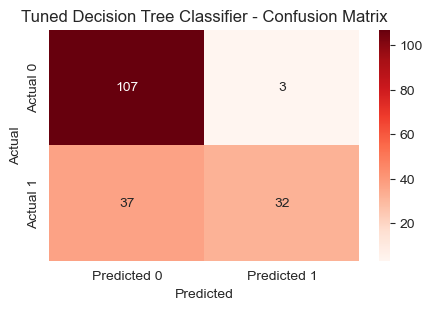

In [33]:
# setting hyperparameter grid for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],            # function to measure split quality
    'splitter': ['best', 'random'],              # strategy to choose split at each node
    'max_depth': [None, 30, 40, 50],            # maximum depth of the tree
    'min_samples_split': [2, 3, 4],             # minimum samples required to split a node
    'min_samples_leaf': [1, 2],                 # minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],     # number of features to consider at each split
    'class_weight': [None, 'balanced'],         # handle class imbalance
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01]     # post-pruning parameter
}

# creating decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# setting up GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# fitting GridSearchCV on training data
grid_search.fit(X_train, y_train)

# getting the best decision tree model
best_dt = grid_search.best_estimator_

# predicting target values using the tuned model
y_pred = best_dt.predict(X_test)

# calculating accuracy of the improved model
accuracy = accuracy_score(y_test, y_pred)
# calculating precision of the improved model
precision = precision_score(y_test, y_pred)
# calculating recall of the improved model
recall = recall_score(y_test, y_pred)
# calculating f1-score of the improved model
f1 = f1_score(y_test, y_pred)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# printing best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("Tuned Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Decision Tree Classifier - Confusion Matrix')
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 4.374364439939079, 'class_weight': None, 'gamma': 0.04570670843111897, 'kernel': 'rbf', 'shrinking': False}
Tuned SVC Results:
Accuracy: 0.8268
Precision: 0.8167
Recall: 0.7101
F1-Score: 0.7597


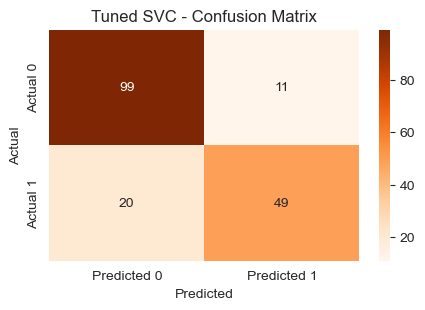

In [34]:
# importing loguniform for continuous random distribution for hyperparameters
from scipy.stats import loguniform
# importing RandomizedSearchCV for randomized hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# setting hyperparameter distribution for SVC
param_dist = {
    'C': loguniform(1e-2, 1e4),       # larger C space for regularization
    'gamma': loguniform(1e-5, 1e1),   # larger gamma space for kernel
    'kernel': ['rbf'],                # using rbf kernel
    'class_weight': [None, 'balanced'],  # handle class imbalance
    'shrinking': [True, False]        # shrinking heuristic
}

# creating support vector classifier
svc = SVC(random_state=42)

# setting up RandomizedSearchCV for hyperparameter tuning
rand_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=25,        # number of random combinations
    cv=5,
    scoring='f1',     # optimize for F1-score
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# fitting RandomizedSearchCV on training data
rand_search.fit(X_train, y_train)

# getting the best SVC model
best_svc = rand_search.best_estimator_

# predicting target values using the tuned model
y_pred = best_svc.predict(X_test)

# calculating accuracy of the improved model
accuracy = accuracy_score(y_test, y_pred)
# calculating precision of the improved model
precision = precision_score(y_test, y_pred)
# calculating recall of the improved model
recall = recall_score(y_test, y_pred)
# calculating f1-score of the improved model
f1 = f1_score(y_test, y_pred)
# creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# printing best parameters and metrics
print("Best Parameters:", rand_search.best_params_)
print("Tuned SVC Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# plotting confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned SVC - Confusion Matrix')
plt.show()